In [1]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화


In [2]:
#Graph
import plotly 
plotly.tools.set_credentials_file(username='Sherryjeon', api_key='3fCTh7mmnI03FNIYxsFO')


import plotly.plotly as py
import plotly.graph_objs as go


In [3]:
loan_dt = pd.read_csv("lending-club-loan-data/loan.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:

print (loan_dt.shape)

(887379, 74)


In [5]:
loan_dt.term.value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [6]:
loan_dt.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


# 1. Checking y

In [7]:
loan_dt_y = loan_dt['loan_status']
loan_dt_y.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

##### Label
* Default
> charged off: 체납 , 추심으로 넘어가는데 동의 (일반적으로 180일 연체) 
<br>
> late(31-120 days) : 1~ 4달의 연체 
<br>
> late(16-30 days) : 1달이내 연체 
<br>
> default : 연체 
<br>
> Does not meet the credit policy. Status:Charged Off : 대출조건 맞지 않지만 회수 안됨
* Paid 
> fully paid 
<br>
> Does not meet the credit policy. Status:Fully Paid : 대출조건 맞지 않아 전액 상환 
* Deduct from dataframe
> Current : 현재 상환진행 
<br>
> Issued : 대출결정 
<br>
> In Grace Period : 상환 유예기간 (거치중인 기간인 듯)

### After removing 'Current & Issued & In Grace Period' and to proceed 
* Pully Paid: 209,711
* Default : 61,176
* Total : 270,887

In [8]:
loan = loan_dt[loan_dt.loan_status !='Current']
loan = loan [loan_dt.loan_status !='Issued']
loan = loan [loan_dt.loan_status !='In Grace Period']

loan = loan.replace(["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"],0) # 상환
loan = loan.replace(['Charged Off','Late (31-120 days)','Late (16-30 days)','Default', 
                         'Does not meet the credit policy. Status:Charged Off'],1) # 연체

loan.loan_status

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



0         0
1         1
2         0
3         0
5         0
7         0
8         1
9         1
10        0
11        0
12        1
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        1
25        0
26        1
27        1
28        0
29        0
30        0
31        0
         ..
887198    0
887202    0
887215    0
887231    1
887248    1
887249    0
887254    1
887258    1
887263    0
887264    0
887268    1
887275    1
887276    1
887279    0
887280    1
887290    1
887303    1
887308    1
887322    1
887330    1
887332    0
887337    1
887345    1
887346    0
887347    0
887351    1
887364    0
887366    0
887369    0
887371    1
Name: loan_status, Length: 270887, dtype: int64

In [9]:
loan.shape

(270887, 74)

In [10]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking duplication between id & member_id
print (loan.duplicated('member_id').value_counts())
print (loan.duplicated('id').value_counts())

# There is no duplication, so remove 'member_id'column
loan.drop('member_id', axis=1, inplace = True)

False    270887
dtype: int64
False    270887
dtype: int64


# 2. Split Dataset

In [12]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq',

In [13]:
features = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [14]:
X = loan[features]
y = loan['loan_status']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [16]:
print ("X_train shape : {}".format(X_train.shape))
print ('y_train shape : {}'.format(y_train.shape))

X_train shape : (203165, 72)
y_train shape : (203165,)


# 3. Data Creansing

## 3-1) Removing Inapposite Variables

> These variables cannot be known at point of issuing loan, so should be removed
* 'last_pymnt_amnt': 마지막 상환금액
* 'recoveries' : 회수된 청구액
* 'out_prncp' : 미납된 원금
* 'out_prncp_inv' : 미납된 원금비율
* total_rec_prncp : 현재까지 받은 원금 (채권자가)
* collection_recovery_fee :추심수수료
* total_pymnt: 상환금액
* total_pymnt_inv :상환금액
* total_rec_int :현재까지 받은 이자
* total_rec_late_fee: 연체료
* last_pymnt_d: 최종 상환일 
* last_credit_pull_d: 최종 신용 등급 조회일(대출 후 )
* next_pymnt_d : 다음 상환일

In [17]:
remove_features = ['last_pymnt_amnt','recoveries','out_prncp',
                   'out_prncp_inv','total_rec_prncp','collection_recovery_fee',
                   'total_pymnt','total_pymnt_inv' ,'total_rec_int',
                   'total_rec_late_fee','last_pymnt_d',
                   'last_credit_pull_d','next_pymnt_d']


In [18]:
X_train = X_train.drop(remove_features, axis = 1)

In [19]:
loan_check = X_train.join(y_train) # make temparary dataframe for preprocessing

In [20]:
loan_check

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
30690,503151,2100.0,2100.0,2100.000000,36 months,6.39,64.27,A,A1,"Aerotek, Inc.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
101060,6814862,3000.0,3000.0,3000.000000,36 months,12.35,100.15,B,B4,alpha natural resources,...,NaN,NaN,NaN,NaN,NaN,26700.0,NaN,NaN,NaN,0
168535,3219064,12000.0,12000.0,12000.000000,36 months,11.14,393.67,B,B2,City of Mission,...,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,0
139340,4424694,21725.0,21725.0,21725.000000,36 months,11.14,712.69,B,B2,HARLAN CHECK CASHING FINANCIAL SERVICES,...,NaN,NaN,NaN,NaN,NaN,33000.0,NaN,NaN,NaN,0
163202,3414601,15250.0,15250.0,15250.000000,36 months,13.11,514.65,B,B4,Duluth transit authority,...,NaN,NaN,NaN,NaN,NaN,24100.0,NaN,NaN,NaN,1
770438,46764111,35000.0,35000.0,35000.000000,60 months,19.52,917.97,E,E3,Senior Business Relationship Manager,...,NaN,NaN,NaN,NaN,NaN,87350.0,NaN,NaN,NaN,0
182002,2306454,25000.0,25000.0,25000.000000,36 months,19.05,917.04,D,D4,Bylight,...,NaN,NaN,NaN,NaN,NaN,33500.0,NaN,NaN,NaN,1
326399,23876062,35000.0,35000.0,35000.000000,60 months,24.08,1008.51,F,F2,Logistics Officer,...,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN,1
441884,11995544,14000.0,14000.0,13975.000000,36 months,11.99,464.94,B,B3,SHIPPING,...,NaN,NaN,NaN,NaN,NaN,24100.0,NaN,NaN,NaN,1
189996,1626888,10800.0,10800.0,10800.000000,36 months,15.31,376.03,C,C2,"Rapid Plumbing Service, Inc.",...,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN,0


In [21]:
X_test = X_test.drop(remove_features, axis=1)

In [22]:
#Test set to be pickle files
pickle.dump(X_test, open( "pickle/X_test", "wb" ) )
pickle.dump(y_test, open( "pickle/y_test", "wb" ) )

In [23]:
loan_check.shape

(203165, 60)

## 3-2) Checking Nan

In [24]:
loan_check.isnull().sum()

id                                  0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       11317
emp_length                          0
home_ownership                      0
annual_inc                          1
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           133865
purpose                             0
title                              10
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        17
earliest_cr_line                   17
inq_last_6mths                     17
mths_since_l

### (1) Mass Nan
* Check all '0' to columns which has over 90% nan

In [25]:
pro = (203056/203165) * 100
print ("proportion : {}". format(pro))

proportion : 99.94634902665321


In [26]:
mass_nan = ['annual_inc_joint' ,'dti_joint','verification_status_joint',
            'open_acc_6m','open_il_6m','open_il_12m','open_il_24m',                   
            'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
            'open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl',                    
            'inq_last_12m' ]

In [27]:
loan_check[mass_nan] = loan_check[mass_nan].fillna(0)

In [28]:
loan_check.isnull().sum()

id                                  0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       11317
emp_length                          0
home_ownership                      0
annual_inc                          1
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           133865
purpose                             0
title                              10
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        17
earliest_cr_line                   17
inq_last_6mths                     17
mths_since_l

### (2)emp_title
* The job title supplied by the Borrower when applying for the loan.


In [29]:
print (loan_check['emp_title'].isnull().value_counts())

False    191848
True      11317
Name: emp_title, dtype: int64


In [30]:
loan_check['emp_title'].value_counts()

Manager                          1600
Teacher                          1580
Registered Nurse                  719
Supervisor                        714
RN                                709
Sales                             558
Project Manager                   550
manager                           512
Office Manager                    484
Driver                            455
Director                          432
Owner                             416
General Manager                   385
Engineer                          382
US Army                           355
teacher                           348
driver                            331
Vice President                    297
Operations Manager                290
Accountant                        284
supervisor                        279
Administrative Assistant          274
Bank of America                   271
Account Manager                   268
President                         260
Police Officer                    257
Executive As

In [31]:
# fill nan as '0' due there is no evidence 
loan_check['emp_title'] = loan_check['emp_title'].fillna(0)

### (3) desc & purpose
* desc : Loan description provided by the borrower
* purpose : A category provided by the borrower for the loan request. 

In [32]:
print (loan_check['desc'].isnull().value_counts())

True     133865
False     69300
Name: desc, dtype: int64


In [33]:
loan_check['purpose'].value_counts()

debt_consolidation    119340
credit_card            39864
home_improvement       11972
other                  11618
major_purchase          5016
small_business          3914
car                     2894
medical                 2273
moving                  1653
wedding                 1504
house                   1327
vacation                1269
educational              310
renewable_energy         211
Name: purpose, dtype: int64

### (4) title 
* The loan title provided by the borrower


In [34]:
print (loan_check['title'].isnull().value_counts())

False    203155
True         10
Name: title, dtype: int64


In [35]:
loan_check['title'].value_counts()

Debt consolidation                         60328
Credit card refinancing                    18835
Debt Consolidation                          8505
Home improvement                            5592
Other                                       5034
Consolidation                               2687
debt consolidation                          2510
Debt Consolidation Loan                     2298
Major purchase                              1818
Business                                    1479
Personal Loan                               1251
Credit Card Consolidation                   1224
Medical expenses                            1134
consolidation                               1065
Home Improvement                             958
Consolidation Loan                           920
Car financing                                806
Credit Card Refinance                        749
Vacation                                     701
Moving and relocation                        690
Personal            

In [36]:
# Since 'title' is similar with 'purpose' too, drop this variable.
loan_check.drop('title', axis =1, inplace = True)

### (5) delinq_2yrs 
* The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
<br> 
*Seems to kind of important feature


In [37]:

print (loan_check.delinq_2yrs.describe())
print(loan_check.delinq_2yrs.value_counts())

count    203148.000000
mean          0.258098
std           0.758372
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64
0.0     169742
1.0      22886
2.0       6451
3.0       2162
4.0        881
5.0        465
6.0        234
7.0        123
8.0         76
9.0         41
10.0        26
11.0        18
12.0        18
14.0         8
13.0         6
15.0         3
18.0         2
16.0         1
29.0         1
20.0         1
21.0         1
17.0         1
19.0         1
Name: delinq_2yrs, dtype: int64


In [38]:
loan_check.loc[loan_check.delinq_2yrs.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
42522,83185,1000.0,1000.0,625.0,36 months,7.12,30.94,A,A1,Mana Products,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42530,73582,3500.0,3500.0,225.0,36 months,10.28,113.39,C,C1,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42524,74014,6450.0,6450.0,0.0,36 months,11.22,211.85,C,C4,Apto Solutions,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42514,85961,1200.0,1200.0,500.0,36 months,9.01,38.17,B,B2,Classic Components,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42518,84670,5000.0,5000.0,300.0,36 months,7.75,156.11,A,A3,Diamond Management and Technology Consultants,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42517,85675,1000.0,1000.0,625.0,36 months,14.07,34.21,E,E3,Macy's,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42527,77757,3000.0,3000.0,0.0,36 months,9.33,95.86,B,B3,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42459,71823,4350.0,4350.0,825.0,36 months,8.07,136.45,A,A4,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42515,85818,5000.0,5000.0,375.0,36 months,11.22,164.23,C,C4,Compensation Solutions,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42494,72819,7200.0,5075.0,350.0,36 months,10.28,164.42,C,C1,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0


In [39]:
# nan member almost fullypaid, so will fill nan as '0'
loan_check.delinq_2yrs.fillna(0, inplace=True)

### (6) earliest_cr_line
* The month the borrower's earliest reported credit line was open

In [40]:
# To assume the debtor's empty ealiest credit line is loan issue date. 
loan_check['earliest_cr_line'].fillna(loan_check['issue_d'], inplace=True)

In [41]:
loan_check[['earliest_cr_line', 'issue_d']].tail()


,earliest_cr_line,issue_d
4343,Dec-2004,Oct-2011
171132,Jul-2003,Jan-2013
426521,Aug-1982,Mar-2014
54747,Jul-1997,Dec-2013
58657,Jun-1990,Nov-2013


In [42]:
loan_check.earliest_cr_line.isnull().value_counts()

False    203165
Name: earliest_cr_line, dtype: int64

### (7) inq_last_6mths 
* The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
* Not sure this feature means positive or negative

In [43]:
print (loan_check['inq_last_6mths'].describe())
print (loan_check['inq_last_6mths'].value_counts())

count    203148.000000
mean          0.884459
std           1.150180
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64
0.0     98650
1.0     58143
2.0     27668
3.0     12816
4.0      3471
5.0      1453
6.0       626
7.0       137
8.0        79
9.0        41
10.0       17
12.0       12
11.0       10
15.0        7
14.0        3
13.0        3
17.0        2
19.0        2
31.0        1
20.0        1
33.0        1
18.0        1
25.0        1
32.0        1
16.0        1
27.0        1
Name: inq_last_6mths, dtype: int64


In [44]:
loan_check.loc[loan_check.inq_last_6mths.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
42522,83185,1000.0,1000.0,625.0,36 months,7.12,30.94,A,A1,Mana Products,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42530,73582,3500.0,3500.0,225.0,36 months,10.28,113.39,C,C1,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42524,74014,6450.0,6450.0,0.0,36 months,11.22,211.85,C,C4,Apto Solutions,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42514,85961,1200.0,1200.0,500.0,36 months,9.01,38.17,B,B2,Classic Components,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42518,84670,5000.0,5000.0,300.0,36 months,7.75,156.11,A,A3,Diamond Management and Technology Consultants,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42517,85675,1000.0,1000.0,625.0,36 months,14.07,34.21,E,E3,Macy's,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42527,77757,3000.0,3000.0,0.0,36 months,9.33,95.86,B,B3,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42459,71823,4350.0,4350.0,825.0,36 months,8.07,136.45,A,A4,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42515,85818,5000.0,5000.0,375.0,36 months,11.22,164.23,C,C4,Compensation Solutions,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
42494,72819,7200.0,5075.0,350.0,36 months,10.28,164.42,C,C1,0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0


In [45]:
# Fill nan as '1' indicate mean
loan_check.inq_last_6mths.fillna(1, inplace=True)

### (8)mths_since_last_delinq 
* The number of months since the borrower's last delinquency.


In [46]:
print (loan_check.mths_since_last_delinq.isnull().value_counts())

True     111956
False     91209
Name: mths_since_last_delinq, dtype: int64


In [47]:
print (loan_check.mths_since_last_delinq.describe())

count    91209.000000
mean        34.887939
std         21.865936
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        148.000000
Name: mths_since_last_delinq, dtype: float64


In [48]:
print (loan_check.mths_since_last_delinq.value_counts().sort_values())

114.0       1
103.0       1
115.0       1
109.0       1
112.0       1
107.0       1
134.0       1
148.0       1
141.0       1
98.0        1
139.0       1
122.0       1
133.0       1
116.0       1
140.0       1
135.0       1
130.0       1
93.0        2
92.0        2
104.0       2
108.0       2
120.0       2
101.0       3
99.0        3
97.0        3
106.0       3
131.0       3
94.0        3
89.0        4
91.0        4
         ... 
38.0     1302
33.0     1310
34.0     1313
36.0     1337
31.0     1358
29.0     1360
24.0     1431
26.0     1433
28.0     1452
25.0     1455
27.0     1461
22.0     1461
30.0     1465
23.0     1475
20.0     1476
19.0     1496
21.0     1544
18.0     1548
11.0     1560
6.0      1582
17.0     1583
16.0     1588
10.0     1604
7.0      1619
13.0     1624
8.0      1643
15.0     1659
12.0     1677
14.0     1697
9.0      1699
Name: mths_since_last_delinq, Length: 122, dtype: int64


In [49]:



y0 = np.array(loan_check.mths_since_last_delinq)


trace0 = go.Box(
    y=y0,
    name = 'mths_since_last_delinq',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)


data = [trace0]
plotly.offline.plot(data)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

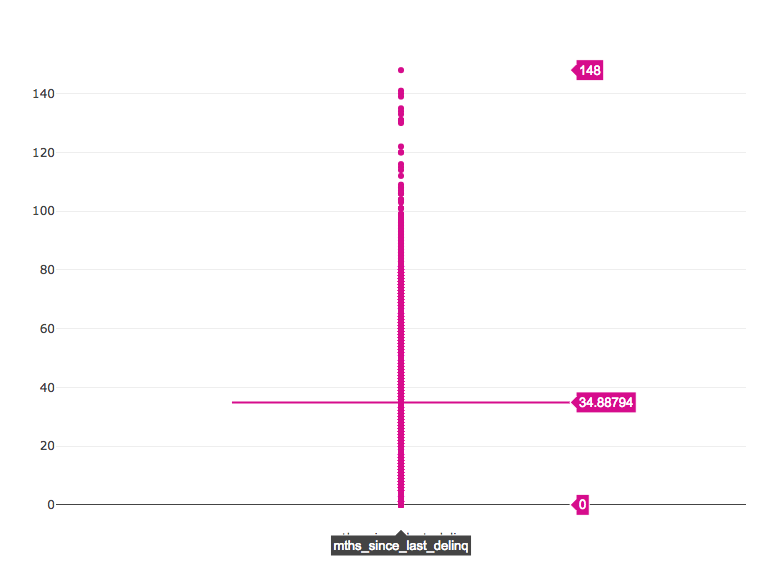

In [50]:
# There is rarely '0', so fill 'nan' as mean
m = loan_check.mths_since_last_delinq.mean()
loan_check.mths_since_last_delinq.fillna(m, inplace=True)

### (9) mths_since_last_record
* The number of months since the last public record.


In [51]:
print (loan_check.mths_since_last_record.isnull().value_counts())
print (loan_check.mths_since_last_record.describe())

True     176929
False     26236
Name: mths_since_last_record, dtype: int64
count    26236.000000
mean        74.313920
std         30.818039
min          0.000000
25%         54.000000
50%         77.000000
75%        101.000000
max        120.000000
Name: mths_since_last_record, dtype: float64


In [52]:


y0 = np.array(loan_check.mths_since_last_record)


trace0 = go.Box(
    y=y0,
    name = 'mths_since_last_record',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)


data = [trace0]
plotly.offline.plot(data)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

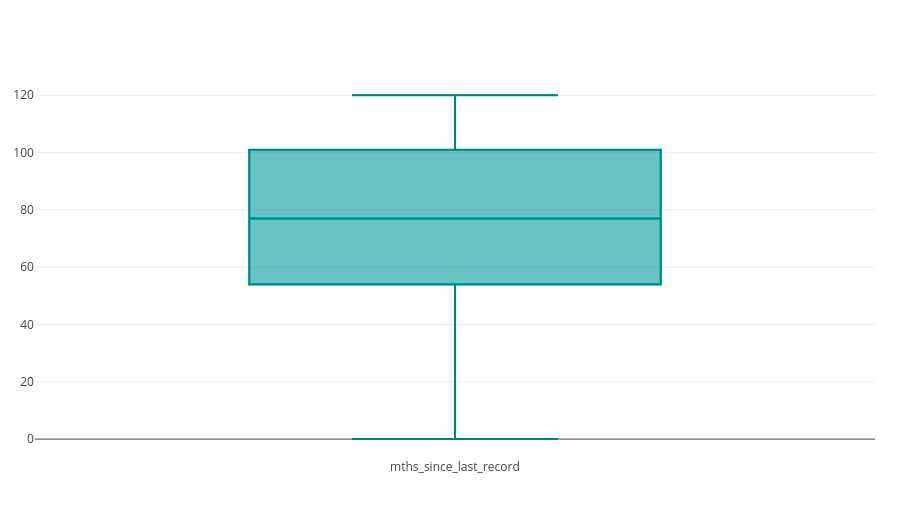

In [53]:
# There is rarely '0' and mean and Q2 is similar, so fill 'nan' as mean
m = loan_check.mths_since_last_record.mean()
loan_check.mths_since_last_record.fillna(m, inplace=True)

### (10) open_acc & pub_rec & total_acc & acc_now_delinq
* These features have same number of nan
* Is the same person?
<br><br>
* open_acc : 29
  <br>
  > The number of open credit lines in the borrower's credit file.(현재 개설되어 있는 한도대출 개수)
* pub_rec : 29
   <br> 
   > Number of derogatory public records (공공기록 수 - 연체 기록과 반비례 : 좋은 기록인 것 같다)
* total_acc : 29
    <br>
    > The total number of credit lines currently in the borrower's credit file (차주의 한도대출 개수)
* acc_now_delinq : 29
    <br>
    > The number of accounts on which the borrower is now delinquent.(현재 연체중인 계좌개수)

In [54]:
temp = ['open_acc','pub_rec','total_acc','acc_now_delinq']
loan_temp = loan_check.loc[loan_check['open_acc'].isnull()]
loan_temp [temp]

# I can check 29 is the same

,open_acc,pub_rec,total_acc,acc_now_delinq
42522,NaN,NaN,NaN,NaN
42530,NaN,NaN,NaN,NaN
42524,NaN,NaN,NaN,NaN
42514,NaN,NaN,NaN,NaN
42518,NaN,NaN,NaN,NaN
42517,NaN,NaN,NaN,NaN
42527,NaN,NaN,NaN,NaN
42459,NaN,NaN,NaN,NaN
42515,NaN,NaN,NaN,NaN
42494,NaN,NaN,NaN,NaN


In [55]:
# Describe without nan
loan_temp_notnull = loan_check.loc[loan_check['open_acc'].notnull()]
print (loan_temp_notnull[temp].describe())

            open_acc        pub_rec     total_acc  acc_now_delinq
count  203148.000000  203148.000000  203148.00000   203148.000000
mean       10.972498       0.146962      25.02160        0.003436
std         4.923884       0.445228      11.78372        0.064670
min         0.000000       0.000000       1.00000        0.000000
25%         7.000000       0.000000      16.00000        0.000000
50%        10.000000       0.000000      23.00000        0.000000
75%        14.000000       0.000000      32.00000        0.000000
max        76.000000      15.000000     150.00000        5.000000


In [56]:

y0 = np.array(loan_temp_notnull.open_acc)
y1 = np.array(loan_temp_notnull.pub_rec)
y2 = np.array(loan_temp_notnull.total_acc)
y3 = np.array(loan_temp_notnull.acc_now_delinq)


trace0 = go.Box(
    y = y0,
    name='open_acc',
    marker=dict(
        color='rgb(7,40,89)',
    ),
    boxmean=True
)
trace1 = go.Box(
    y = y1,
    name='pub_rec',
    marker=dict(
        color='rgb(9,56,125)',
    ),
    boxmean='sd'
)
trace2 = go.Box(
    y = y2,
    name=' total_acc',
    marker=dict(
        color='rgb(8,81,156)',
    ),
    boxmean='sd'
)
trace3 = go.Box(
    y = y3,
    name='acc_now_delinq',
    marker=dict(
        color='rgb(107,174,214)',
    ),
    boxmean='sd'
)

data = [trace0, trace1, trace2, trace3]
plotly.offline.plot(data)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

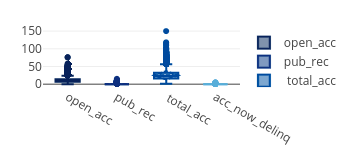


In [57]:
# Widespred features, open_acc, total_acc will be filled as mean
# and rest of features will be displaced '0'
a_m = loan_check.open_acc.mean()
t_m = loan_check.total_acc.mean()

loan_check.open_acc.fillna(a_m, inplace = True)
loan_check.total_acc.fillna(t_m, inplace = True)
loan_check.pub_rec.fillna(0, inplace=True)
loan_check.acc_now_delinq.fillna(0, inplace=True)

In [58]:
#memory collecting

del loan_temp, loan_temp_notnull
gc.collect()

272

## Intermediate Check

In [59]:
loan_check.isnull().sum()

id                                  0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          1
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           133865
purpose                             0
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_l

### (11) annual_inc
* The self-reported annual income provided by the borrower during registration.


In [60]:
print (loan_check.annual_inc.describe())

count    2.031640e+05
mean     7.245049e+04
std      6.025999e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.700000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64


In [61]:
loan_check.loc[loan_check.annual_inc.isnull()].emp_length

42450    < 1 year
Name: emp_length, dtype: object

In [62]:
# The debtor's employ length is under 1 year, so fill na ans min
m = loan_check.annual_inc.min()
loan_check.annual_inc.fillna(m, inplace = True)

### (12) revol_util
* Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [63]:
print (loan_check.revol_util.describe())
print ("most frequently used value: {}".format(loan_check.revol_util.mode()))

#X = loan_col_real.loc[loan_col_real['revol_util'].notnull()]
#X = X.revol_util.astype(int)

count    202986.000000
mean         54.551004
std          24.789805
min           0.000000
25%          36.500000
50%          56.000000
75%          74.100000
max         892.300000
Name: revol_util, dtype: float64
most frequently used value: 0    0.0
dtype: float64


In [64]:
loan_check.sort_values('revol_util', ascending=False).revol_util
# second maximum value is 153

406516    892.3
423448    153.0
404996    148.0
283910    146.1
448859    141.8
745048    141.1
778872    132.1
275440    130.2
238448    129.5
270241    129.4
851643    127.6
99757     127.6
847905    127.1
862987    126.3
750831    126.1
330344    123.2
139067    122.5
103238    120.2
261605    118.9
760673    117.7
594856    117.6
818107    116.4
137140    115.3
373443    115.1
871621    114.5
531851    113.7
277957    113.4
350092    113.1
440719    113.0
449482    113.0
          ...  
29055       NaN
223036      NaN
42520       NaN
103483      NaN
42532       NaN
94493       NaN
33147       NaN
639669      NaN
39018       NaN
228744      NaN
146308      NaN
884401      NaN
201038      NaN
37609       NaN
44642       NaN
385835      NaN
179447      NaN
13930       NaN
125038      NaN
32008       NaN
451515      NaN
335603      NaN
823781      NaN
28239       NaN
18045       NaN
205821      NaN
42450       NaN
78172       NaN
136654      NaN
42525       NaN
Name: revol_util, Length

In [65]:

y0 = np.array(loan_check.revol_util)


trace0 = go.Box(
    y=y0,
    name = 'revol_util',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)


data = [trace0]
plotly.offline.plot(data)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

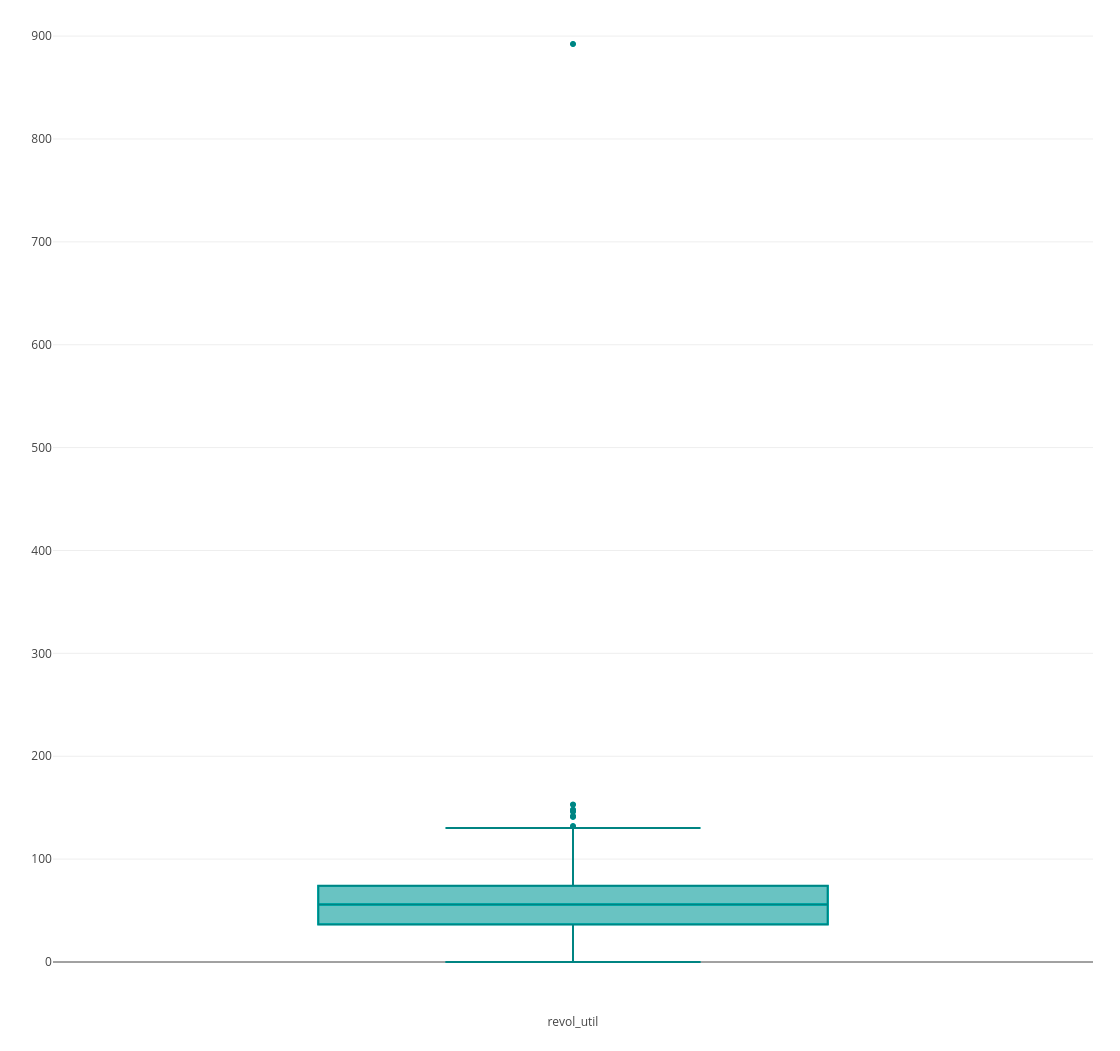

In [66]:
# check the outlier
loan_check.sort_values('revol_util', ascending = False)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status
406516,14539247,3500.0,3500.0,3500.000000,36 months,12.49,117.08,B,B4,Budget Analyst,...,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0
423448,13027755,35000.0,35000.0,35000.000000,36 months,25.83,1407.01,G,G2,HR Director,...,0.0,0.0,0.0,0.0,0.0,10800.0,0.0,0.0,0.0,0
404996,14539936,25000.0,25000.0,25000.000000,60 months,20.49,669.19,E,E2,VP of MultiFamily Investments,...,0.0,0.0,0.0,0.0,0.0,13600.0,0.0,0.0,0.0,1
283910,30375649,12600.0,12600.0,12600.000000,36 months,8.39,397.11,A,A5,"AVP, Senior Leasing Assistant",...,0.0,0.0,0.0,0.0,0.0,14100.0,0.0,0.0,0.0,0
448859,11455074,35000.0,35000.0,35000.000000,60 months,21.48,956.35,E,E2,Senior client service specialist,...,0.0,0.0,0.0,0.0,0.0,5700.0,0.0,0.0,0.0,1
745048,49198106,18275.0,18275.0,18275.000000,36 months,13.99,624.51,C,C4,Consultant,...,0.0,0.0,0.0,0.0,0.0,10800.0,0.0,0.0,0.0,1
778872,46467106,9175.0,9175.0,9175.000000,36 months,17.57,329.73,D,D4,Deckhand,...,0.0,0.0,0.0,0.0,0.0,14100.0,0.0,0.0,0.0,1
275440,31627691,14000.0,14000.0,14000.000000,60 months,24.50,406.83,F,F3,Account Executive,...,0.0,0.0,0.0,0.0,0.0,9400.0,0.0,0.0,0.0,1
238448,36200826,12550.0,12550.0,12525.000000,60 months,16.49,308.47,D,D3,Manager,...,0.0,0.0,0.0,0.0,0.0,10100.0,0.0,0.0,0.0,1
270241,32279004,18000.0,18000.0,18000.000000,60 months,17.57,452.89,D,D4,District sales manager,...,0.0,0.0,0.0,0.0,0.0,10300.0,0.0,0.0,0.0,1


In [67]:
# fill outlier's value as second max
# and about nan, will be replaced with min

#loan_check.loc[14539247, 'revol_util']=153
#loan_check.revol_util.isnull().value_counts()
loan_check.revol_util = loan_check.revol_util.replace({892.3:153})

In [68]:
m = loan_check.revol_util.min()
loan_check.revol_util.fillna(m, inplace = True)

### (13) collections_12_mths_ex_med
* Number of collections in 12 months excluding medical collections


In [69]:
print(loan_check.collections_12_mths_ex_med.describe())
print(loan_check.collections_12_mths_ex_med.value_counts())

count    203068.000000
mean          0.007387
std           0.093964
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: collections_12_mths_ex_med, dtype: float64
0.0    201693
1.0      1271
2.0        88
3.0        12
4.0         3
5.0         1
Name: collections_12_mths_ex_med, dtype: int64


In [70]:
# fill nan as mode value, which is '0'
loan_check.collections_12_mths_ex_med.fillna(0, inplace = True)

print (loan_check.collections_12_mths_ex_med.isnull().value_counts())

False    203165
Name: collections_12_mths_ex_med, dtype: int64


### (14) mths_since_last_major_derog 
* Months since most recent 90-day or worse rating

In [71]:
print (loan_check.mths_since_last_major_derog.isnull().value_counts())
print (loan_check.mths_since_last_major_derog.describe())

True     164247
False     38918
Name: mths_since_last_major_derog, dtype: int64
count    38918.000000
mean        43.389717
std         21.676539
min          0.000000
25%         26.000000
50%         43.000000
75%         60.000000
max        159.000000
Name: mths_since_last_major_derog, dtype: float64


In [72]:

y0 = np.array(loan_check.mths_since_last_major_derog)


trace0 = go.Box(
    y=y0,
    name = 'mths_since_last_major_derog',
    marker = dict(
        color = '#FF851B'
    )
)


data = [trace0]
plotly.offline.plot(data)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

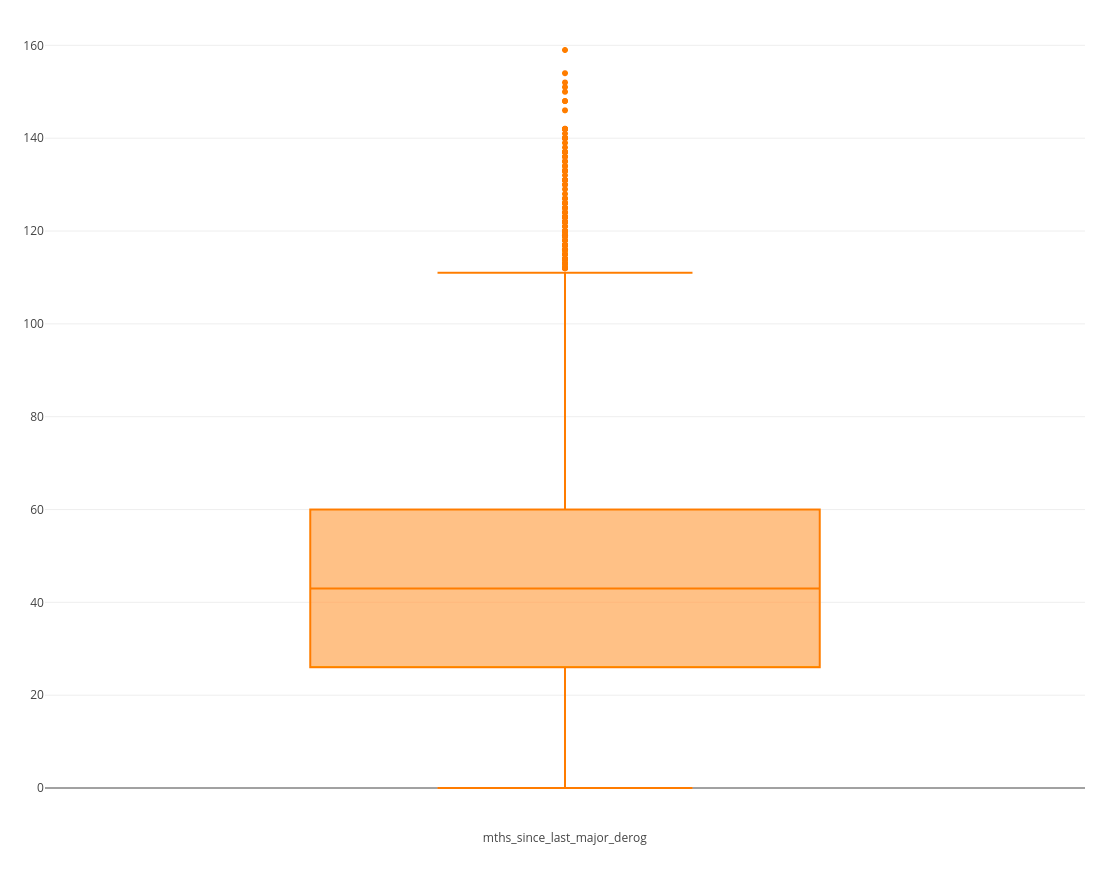

In [73]:
# There's some outlier, and fill nan with 2Q (43)
loan_check.mths_since_last_major_derog.fillna(43, inplace=True)

In [74]:
print (loan_check.mths_since_last_major_derog.describe())

count    203165.000000
mean         43.074654
std           9.488400
min           0.000000
25%          43.000000
50%          43.000000
75%          43.000000
max         159.000000
Name: mths_since_last_major_derog, dtype: float64


### (15) tot_coll_amt & tot_cur_bal & total_rev_hi_lim
* tot_coll_amt : Total collection amounts ever owed
* tot_cur_bal : Total current balance of all accounts
* total_rev_hi_lim : Total revolving high credit/credit limit
<br><br>
> number of nan is the same

In [75]:
temp = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']
loan_temp = loan_check.loc[loan_check['tot_coll_amt'].isnull()]
loan_temp [temp]

# I can check debtors are the same

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
30690,NaN,NaN,NaN,0
4658,NaN,NaN,NaN,0
888,NaN,NaN,NaN,0
22763,NaN,NaN,NaN,0
228064,NaN,NaN,NaN,0
27426,NaN,NaN,NaN,0
223107,NaN,NaN,NaN,0
25090,NaN,NaN,NaN,0
4626,NaN,NaN,NaN,0
42088,NaN,NaN,NaN,0


In [76]:
# Describe without nan
loan_temp_notnull = loan_check.loc[loan_check['tot_coll_amt'].notnull()]
print (loan_temp_notnull[temp].describe())

       tot_coll_amt   tot_cur_bal  total_rev_hi_lim    loan_status
count  1.531690e+05  1.531690e+05      1.531690e+05  153169.000000
mean   2.192457e+02  1.369211e+05      2.954359e+04       0.245898
std    2.344717e+04  1.504176e+05      2.968187e+04       0.430620
min    0.000000e+00  0.000000e+00      0.000000e+00       0.000000
25%    0.000000e+00  2.832300e+04      1.320000e+04       0.000000
50%    0.000000e+00  7.906600e+04      2.210000e+04       0.000000
75%    0.000000e+00  2.063430e+05      3.660000e+04       0.000000
max    9.152545e+06  4.772549e+06      2.013133e+06       1.000000


In [99]:
# Draw Boxplot
y0 = np.array(loan_temp_notnull.tot_coll_amt)
y1 = np.array(loan_temp_notnull.tot_cur_bal)
y2 = np.array(loan_temp_notnull.total_rev_hi_lim)
y3 = np.array(loan_temp_notnull.acc_now_delinq)


trace0 = go.Box(
    y = y0,
    name='tot_coll_amt',
    marker=dict(
        color='rgb(7,40,89)',
    ),
    boxmean=True
)
trace1 = go.Box(
    y = y1,
    name='tot_cur_bal',
    marker=dict(
        color='rgb(9,56,125)',
    ),
    boxmean='sd'
)
trace2 = go.Box(
    y = y2,
    name='total_rev_hi_lim',
    marker=dict(
        color='rgb(8,81,156)',
    ),
    boxmean='sd'
)


data = [trace0, trace1, trace2]
plotly.offline.plot(data)

'file:///Users/SherryJeon/GoogleDriver/FastCampus/Project/personal/temp-plot.html'

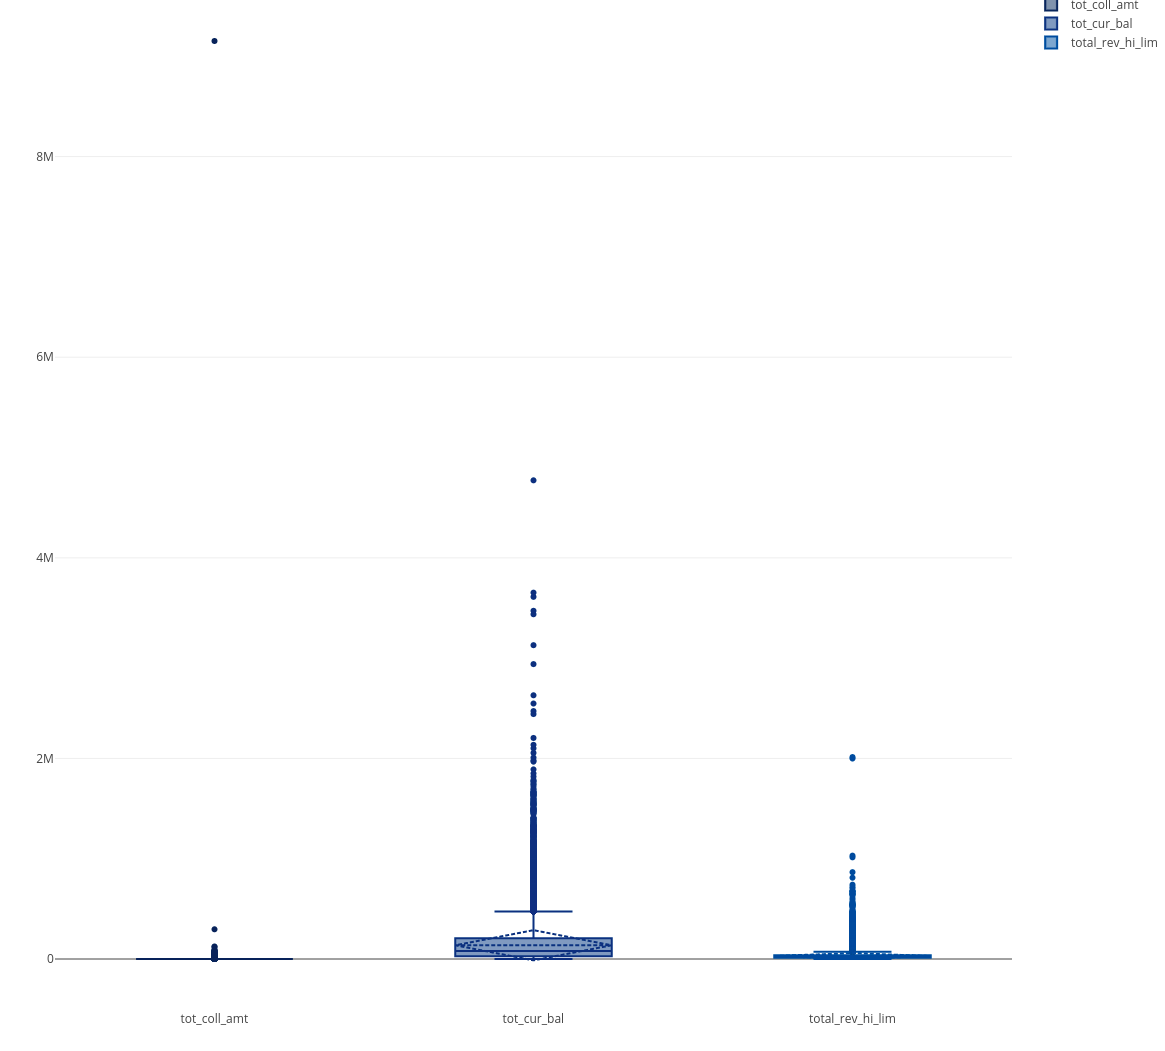

In [77]:
# There are strong outlier with 'tot_coll_amt' -> fill nan with '0'
# 'total_rev_hi_lim', nan will be replaced to mean
#Let's check tot_cur_bal and funded_amnt
m=loan_check.total_rev_hi_lim.mean()
loan_check.tot_coll_amt.fillna(0, inplace=True)
loan_check.total_rev_hi_lim.fillna(m, inplace=True)
temp = loan_temp_notnull[['tot_cur_bal', 'funded_amnt']]


In [78]:
temp.describe()

,tot_cur_bal,funded_amnt
count,1.531690e+05,153169.000000
mean,1.369211e+05,14302.988692
std,1.504176e+05,8252.202333
min,0.000000e+00,1000.000000
25%,2.832300e+04,8000.000000
50%,7.906600e+04,12000.000000
75%,2.063430e+05,20000.000000
max,4.772549e+06,35000.000000


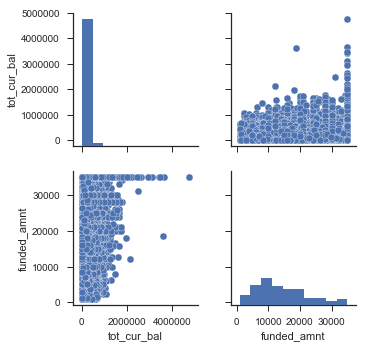

In [79]:
# There is not important relationship between two variables

sns.pairplot(data=temp, dropna=True)

plt.show()

In [80]:
# fill nan to be 2Q due to outliers
q = 7.906600e+04 
loan_check.tot_cur_bal.fillna(q, inplace=True)


## Last nan Checking

In [81]:
loan_check.isnull().sum()

id                                  0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           133865
purpose                             0
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq              0
mths_since_l

In [82]:
loan

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,Veolia Transportaton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,MKC Accounting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,Starbucks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1070078,6500.0,6500.0,6500.000000,60 months,14.65,153.45,C,C3,Southwest Rural metro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1069908,12000.0,12000.0,12000.000000,36 months,12.69,402.54,B,B5,UCLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Export Dataframe as Pickle

In [83]:
#Test set to be pickle files
pickle.dump(loan_check, open( "pickle/loan1", "wb" ) )
pickle.dump(y_test, open( "pickle/y1", "wb" ) )

OSError: [Errno 28] No space left on device